# Neural Networks Introduction

# 🧠 Introduction to Neural Networks: A Visual Guide

**Objective:** To understand the fundamental structure and components of a basic neural network, and to build an intuition for how it processes information.



## Topic 1: The Problem - Easy for You, Hard for a Computer

Your brain can instantly recognize handwritten digits, even though the pixel data for each is very different. This is an incredible feat of **pattern recognition**.

If I asked you to write a traditional computer program with fixed rules (e.g., `if/else` statements) to recognize these, the task would become dauntingly difficult.

![A collage of handwritten digits from the MNIST dataset](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)



**The Goal:** Build a system that can *learn* to recognize these patterns on its own, without explicit programming for every possibility. This is the motivation for neural networks.



## Topic 2: What is a Neuron?

Forget biology for a moment. In this context, a **neuron** is simply a thing that **holds a number**. Specifically, it holds a number between **0 and 1**.

This number is called the neuron's **"activation"**.

You can think of it like a lightbulb:
* Activation of 0 = Off ⚫
* Activation of 1 = Fully On ⚪

![A single glowing lightbulb representing an activated neuron](https://cdn-icons-png.flaticon.com/512/702/702814.png)




## The Anatomy of the Network - Layers

A neural network organizes these neurons into distinct layers.

* **Input Layer:** Receives the initial data. For a 28x28 pixel image, this layer has **784 neurons**.
* **Hidden Layers:** The layers in the middle where the real processing happens. We'll use **2 hidden layers** in our example.
* **Output Layer:** Produces the final result. To identify digits 0-9, we need **10 neurons**.

![A simple diagram of a neural network with input, hidden, and output layers](./images/simple_neural_network.png)


## Topic 2 (Cont.): How Information Flows - The Big Idea

The **activations** in one layer determine the **activations** in the next layer.

When we feed an image into the input layer, the pattern of activated neurons triggers a specific pattern in the next layer, which in turn triggers the next, and so on, until a final pattern emerges in the output layer.

The **brightest neuron in the output layer** is the network's final answer.

![An animation showing information flowing through a neural network](./images/Backpropagation.gif)


## The Hidden Layers - Abstraction

How does a network recognize a "9"? We recognize it as a **loop on top of a line**.

![A diagram showing a neural network building complex shapes from simple edges](./images/cnn_diagram.png)

**The Hope:** We wish for the network to learn hierarchically, building up abstractions:

* **First Hidden Layer:** Neurons might learn to recognize simple **edges and curves**.
* **Second Hidden Layer:** Neurons combine those signals to recognize more complex shapes like **loops or corners**.
* **Output Layer:** Neurons then combine these higher-level shapes to recognize complete **digits**.


## Topic 4: The Mechanics: Weights

How does one layer influence the next? With **weights**.

Every connection between neurons has a **weight**, which is just a number (positive or negative). Weights are the "dials and knobs" of the network, controlling how much influence one neuron has on the next.

To detect a specific pattern, a neuron might assign **positive weights** to pixels forming the pattern and **negative weights** to the surrounding pixels.

![A diagram showing connection weights between two layers of neurons](./images/maxresdefault.jpg)


## The Mechanics: Bias

After calculating the **weighted sum** (summing up previous neuron activations multiplied by their weights), we add one final number called a **bias**.

The bias acts as an "activation threshold"—it determines how high the weighted sum needs to be before the neuron starts to become meaningfully active.

`Neuron's Input = (Weighted Sum) + Bias`

![A diagram illustrating a bias being added into a neuron's calculation](./images/llustration-of-a-single-neuron-perceptron-in-a-standard-ANN-Each-feature-coefficient-x.ppm)


## The "Squishification": Activation Functions

The `Neuron's Input` (weighted sum + bias) can be any real number. We need to "squish" this value into the **0-to-1 range** to become the neuron's final activation. This is the job of an **activation function**.

A classic choice is the **Sigmoid function**. It takes any number and maps it to a value between 0 and 1.


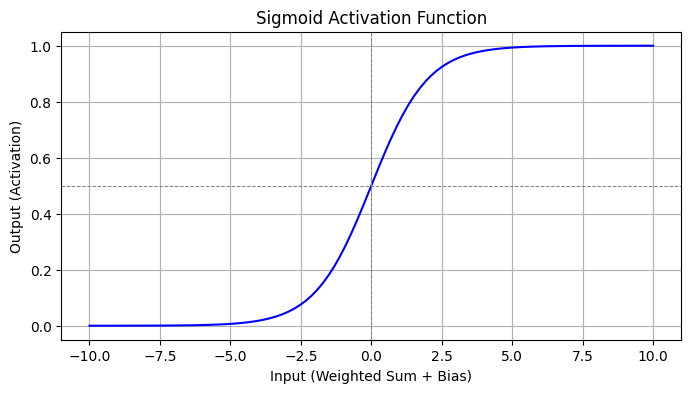

In [ ]:
# Let's visualize the sigmoid function!
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """A function that maps any value to a value between 0 and 1."""
    return 1 / (1 + np.exp(-x))

# Generate a range of numbers to plot
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Plot the function
plt.figure(figsize=(8, 4))
plt.plot(x, y, color='blue')
plt.title("Sigmoid Activation Function")
plt.xlabel("Input (Weighted Sum + Bias)")
plt.ylabel("Output (Activation)")
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.show()

## Topic 5 (Cont.): Modern Activation Functions - ReLU

While Sigmoid is great for understanding the concept, most modern networks use a different activation function. A very common one is the **ReLU (Rectified Linear Unit)**.

`ReLU(x) = max(0, x)`

![A graph showing the simple, hinged shape of the ReLU activation function](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Rectifier_and_softplus_functions.svg/640px-Rectifier_and_softplus_functions.svg.png)

ReLU has been found to help networks train faster and more effectively for many tasks.


## Topic 6: The Network as a Giant, Complicated Function

Ultimately, the entire neural network is just one massive mathematical function.

* **Input:** 784 numbers (pixel values).
* **Parameters:** Thousands of "dials and knobs" in the form of **weights** and **biases**. Our example network has almost **13,000**!
* **Output:** 10 numbers (confidence scores for each digit).

![An abstract image representing a complex black box function](./images/hidden-layers.png)

**"Learning"** is the process of automatically finding the right settings for all these parameters so the function consistently gives the correct output.


In [5]:
# Let's calculate the total number of parameters in our example network!

input_neurons = 784
hidden_layer_1_neurons = 16
hidden_layer_2_neurons = 16
output_neurons = 10

# Parameters for Input -> Hidden 1
params_l1 = (input_neurons * hidden_layer_1_neurons) + hidden_layer_1_neurons

# Parameters for Hidden 1 -> Hidden 2
params_l2 = (hidden_layer_1_neurons * hidden_layer_2_neurons) + hidden_layer_2_neurons

# Parameters for Hidden 2 -> Output
params_l3 = (hidden_layer_2_neurons * output_neurons) + output_neurons

total_parameters = params_l1 + params_l2 + params_l3

print(f"Parameters (W+b) for Input -> Hidden 1: {params_l1}")
print(f"Parameters (W+b) for Hidden 1 -> Hidden 2: {params_l2}")
print(f"Parameters (W+b) for Hidden 2 -> Output: {params_l3}")
print(f"---------------------------------------------------")
print(f"Total learnable parameters in the network: {total_parameters}")

Parameters (W+b) for Input -> Hidden 1: 12560
Parameters (W+b) for Hidden 1 -> Hidden 2: 272
Parameters (W+b) for Hidden 2 -> Output: 170
---------------------------------------------------
Total learnable parameters in the network: 13002


## Summary & What's Next?

**Key Takeaways:**
* A neural network is a system of layered **neurons** that process information.
* **Weights** and **biases** are the learnable parameters that define how signals propagate.
* **Activation functions** (like Sigmoid or ReLU) normalize neuron outputs.
* The entire network functions as a complex, adaptable mathematical function.

![An image of a brain made of digital circuitry](./images/brain-made-from-digital-circuit-patterns-representing-technology_1284361-1110.jpg)

**What's Next? The Most Important Part!**

We've explored the *structure* of a neural network. But the critical question remains: How does this network *learn* the correct values for its thousands of weights and biases just by looking at data?

That process is called **training**, and it's what we'll dive into next!
